## Importing Modules

In [63]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from skimage import measure

## Reading and Showing Image

In [52]:
def readimage(string):
    image = cv2.imread(string,0) 
    imagefinal = cv2.resize(image, (512,512))
    return imagefinal

def showimage(image):
    plot = plt.imshow(image,cmap='gray')
    plt.show(plot)
    return plot

## Adding Blur and Noise to Image

In [82]:
# Defining Values

blur = 5
variance = 800

In [83]:
def add_blur(image):
    imgblur = cv2.blur(image,(blur,blur))
    return imgblur

def add_noise(image):
    mean=0
    sigma = variance**0.5
    row,col= image.shape
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy_image = np.uint8(image + gauss)
    return noisy_image

## Calculating PSNR

In [84]:
def psnr(img1,img2):
    return skimage.measure.compare_psnr(img1,img2)

## Wiener Filter

In [85]:
def psd(image):
    fourierimage = np.fft.fft2(image)
    psdimage = fourierimage*np.conj(fourierimage)/(512*512)
    return psdimage

def wiener_filter():
    h=np.ones((blur,blur))/(blur*blur)
    H=np.fft.fft2(h,[512,512])
    psdmean = 0
    for i in glob.glob("/home/os-lab/Dataset/Dataset/*.png"):
        grayimage = cv2.imread(i,0) 
        image = cv2.resize(grayimage, (512, 512))
        img_blur=add_blur(image) 
        noisy=add_noise(img_blur)

        PSD = psd(image)
        psdmean+=PSD
    psdmean=psdmean/14
    N=variance*np.ones((512,512))
    Filter=np.conj(H)/(H*np.conj(H)+N/psdmean)
    
    return Filter

## Building Filter on Dataset

In [86]:
Filter = wiener_filter()

# Testing of Filter

## Input Test Image

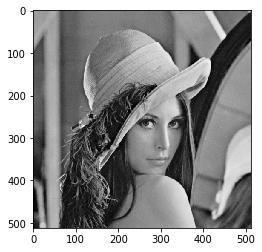

In [87]:
image=readimage("/home/os-lab/lena.png")
showimage(image)

## Adding Blur

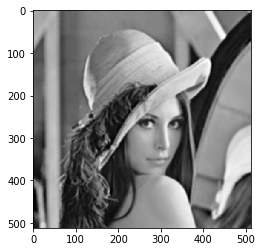

In [88]:
img_blur=add_blur(image)
showimage(img_blur)

## Adding Noise

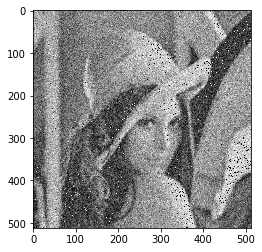

In [89]:
noise = add_noise(img_blur)
showimage(noise)

## Testing Filter

/home/os-lab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


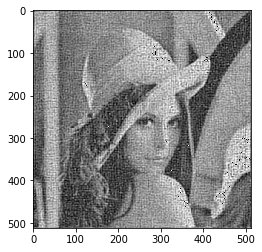

In [90]:
def filter_test(noisy_image,wiener_filter):
    f=wiener_filter*np.fft.fft2(noisy_image)
    o=np.fft.ifft2(f)
    output=np.uint8(o)
    return output
result = filter_test(noise,W)
showimage(result)

## PSNR for Test Image

In [91]:
print("PSNR Value between input image and noisy image",psnr(image,noise))
print("PSNR Value between input image and restored image",psnr(image,result))

PSNR Value between input image and noisy image 17.81572618347758
PSNR Value between input image and restored image 19.286793089412406
